In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from nltk.tokenize import word_tokenize
import nltk
from nltk import pos_tag, ne_chunk
import nltk

# Read the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\arnip\Downloads\amazon_reviews.csv.zip")
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


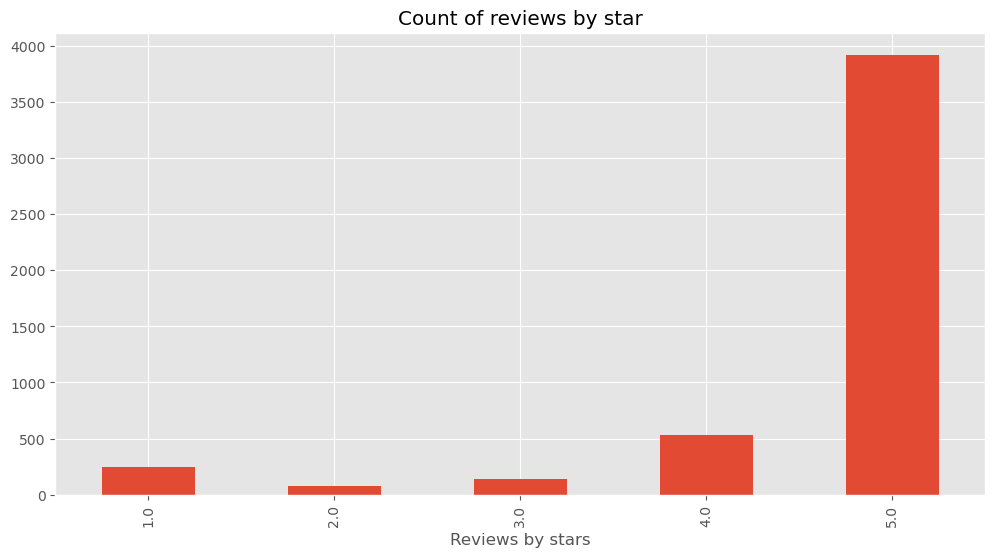

In [4]:
ax = df['overall'].value_counts().sort_index()\
.plot(kind='bar', title='Count of reviews by star', 
      figsize= (12 , 6))
ax.set_xlabel('Reviews by stars')
plt.show()

# Basic NLTK 

In [5]:
example = df['reviewText'][50]
example

"A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with."

In [6]:
tokens = nltk.word_tokenize(example)
tokens[: 10]

['A', 'memory', 'card', 'either', 'works', 'or', 'it', 'does', "n't", '.']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[: 10]

[('A', 'DT'),
 ('memory', 'NN'),
 ('card', 'NN'),
 ('either', 'CC'),
 ('works', 'VBZ'),
 ('or', 'CC'),
 ('it', 'PRP'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('.', '.')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  A/DT
  memory/NN
  card/NN
  either/CC
  works/VBZ
  or/CC
  it/PRP
  does/VBZ
  n't/RB
  ./.
  This/DT
  was/VBD
  always/RB
  going/VBG
  to/TO
  be/VB
  a/DT
  one/CD
  star/NN
  or/CC
  five/CD
  star/NN
  review/NN
  -/:
  no/DT
  middle/JJ
  ground.The/NN
  adapter/NN
  is/VBZ
  a/DT
  nice/JJ
  bonus/NN
  too/RB
  ,/,
  though/IN
  I/PRP
  do/VBP
  n't/RB
  think/VB
  I/PRP
  have/VBP
  anything/NN
  to/TO
  use/VB
  it/PRP
  with/IN
  ./.)


# VADER{valence aware dictionary and sentiment reasoner)

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm


sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [11]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [12]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

# Run the Polarity score on the dataset

In [13]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviewText']
    myid = row['Unnamed: 0']

    if isinstance(text, str):  
        res[myid] = sia.polarity_scores(text)
    else:
        res[myid] = {'neg': None, 'neu': None, 'pos': None, 'compound': None}

100%|█████████████████████████████████████████████████████████████████████████████| 4915/4915 [00:06<00:00, 810.16it/s]


In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Unnamed: 0'})
vaders = vaders.merge(df, how = 'left')

In [15]:
vaders.head()

,Unnamed: 0,neg,neu,pos,compound,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,0.688,0.312,0.0,-0.296,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0.075,0.925,0.0,-0.296,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,0.077,0.923,0.0,-0.3089,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,0.0,0.909,0.091,0.7081,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,0.038,0.835,0.127,0.7087,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


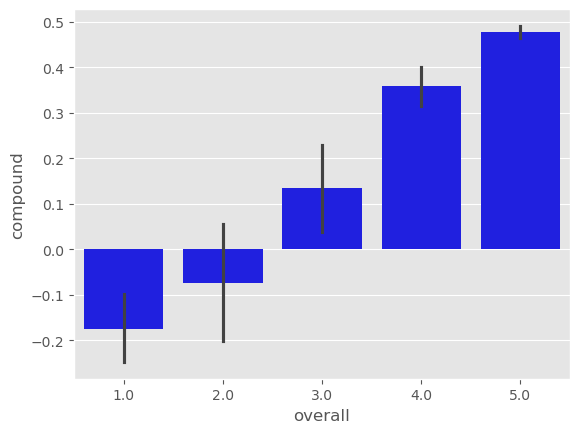

In [16]:
sns.barplot(data= vaders, x = 'overall', y = 'compound', color = 'blue')
ax.set_title('Compound score by star review')
plt.show()

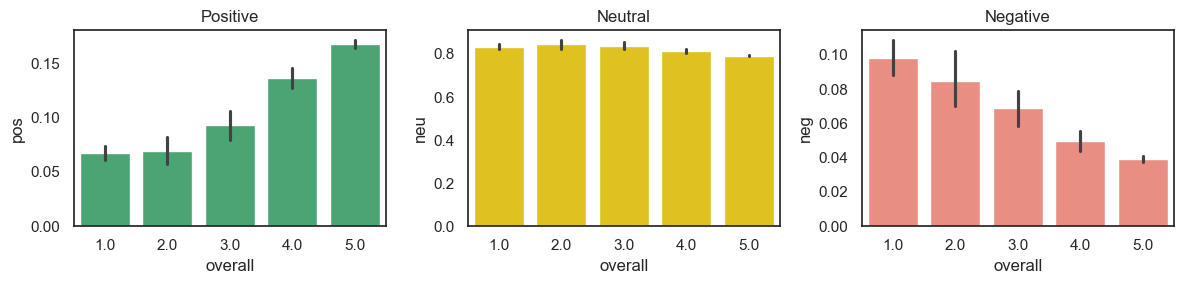

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='overall', y='pos', ax=axs[0], color='mediumseagreen')
sns.barplot(data=vaders, x='overall', y='neu', ax=axs[1], color='gold')
sns.barplot(data=vaders, x='overall', y='neg', ax=axs[2], color='salmon')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

sns.set_theme(style="darkgrid")     
sns.set_theme(style="white")       
sns.set_palette("husl")            

plt.tight_layout()
plt.show()

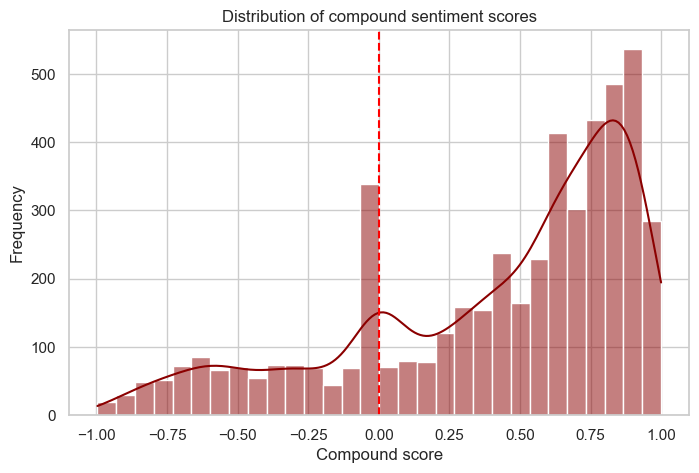

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(vaders['compound'], bins=30, kde=True, color='darkred')

plt.title('Distribution of compound sentiment scores')
plt.xlabel('Compound score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Robert Pretrained model

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification  
from scipy.special import softmax 
import torch

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
print(example)
sia.polarity_scores(example)

A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [23]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.15133694, 'roberta_neu': 0.40594324, 'roberta_pos': 0.44271985}


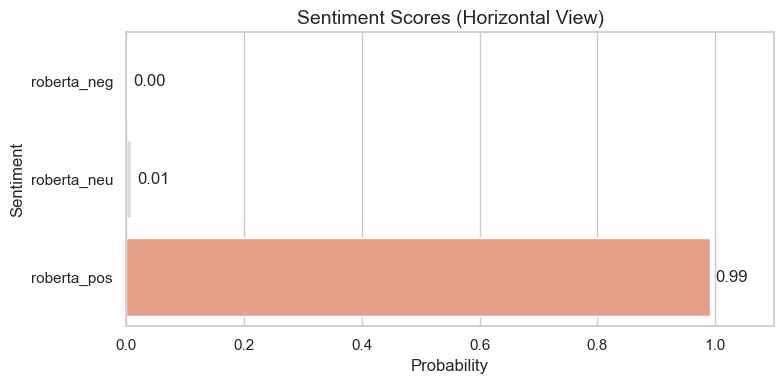

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from the scores_dict
df_scores = pd.DataFrame({
    'Sentiment': list(scores_dict.keys()),
    'Score': list(scores_dict.values())
})

# Plot using hue and turn off legend
plt.figure(figsize=(8, 4))
sns.barplot(data=df_scores, y='Sentiment', x='Score', hue='Sentiment', dodge=False, palette='coolwarm', legend=False)

plt.title("Sentiment Scores (Horizontal View)", fontsize=14)
plt.xlabel("Probability")
plt.xlim(0, 1.1)

# Add labels
for i, row in df_scores.iterrows():
    plt.text(row['Score'] + 0.01, i, f"{row['Score']:.2f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()


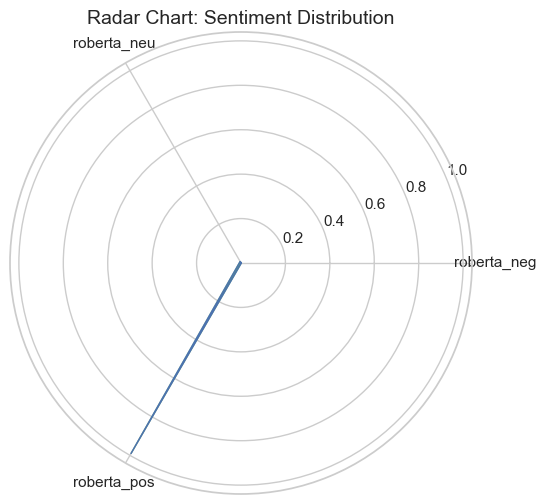

In [30]:
from math import pi

labels = list(scores_dict.keys())
values = list(scores_dict.values())
values += values[:1] 

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels)

ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, alpha=0.4, color='green')

plt.title("Radar Chart: Sentiment Distribution", size=14)
plt.show()
